In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from scipy import constants

In [2]:

G = constants.G
c = constants.speed_of_light

kg=1.989*10**30 #kg
m = 1.989 * 10**30              # mass of the sun in kg
M = 10**6 * m                   # mass of BH
rho=1410 #density of the sun in kg/m^3 

r_star = 696340*10**3


In [3]:
"Initial conditions"

x0 =float(0)
y0 =float(8*10**9)     # close to the isco radius
v_x0 =  10**8
v_y0 =  0


In [4]:
A = G*M


def L(x,y, m):
    '''
    function that calculates the angular momentum for given x, y
    L is constant over time
    Since at point t = 0, we have only a velocity component in x-direction, so we calculate the L(0) = L(t) to be:
    '''
    print("x={},y={}".format(x,y))
    x = float(x)
    y = float(y)
    r = np.sqrt((x**2+y**2))
    return r*m*v_x0

L = L(x0, y0, m)
print("The angular momentum is",L)

A = G*M
B = L**2 / m**2             # 0.005
C = 3*G*M*L**2 / (m*c**2)   # 0.8

r_ss   = 2*A/c**2
r_isco = 3*r_ss
r_tidal = r_star * (M/m)**(1/3)

x=0.0,y=8000000000.0
The angular momentum is 1.5912e+48


In [5]:

kepler = 2             

t = np.linspace(0,200000,20000)

t0 = t[0]

h = len(t)


def v_x_(t,x,y,v_x,v_y):
    r = np.sqrt((x**2+y**2))
    if kepler == True:
        return -A*x / r**3 #+ B*x / r**4 - C*x / r**5
    elif kepler == 2:
        return -A*x / r**3 - 3*(G*M/c)**2*x / r**4
    else:
        return -A*x / r**3 + B*x / r**4 - C*x / r**5

def v_y_(t,x,y,v_x,v_y):
    r = np.sqrt((x**2+y**2))
    if kepler == True:
        return -A*y / r**3 #+ B*y / r**4 - C*y / r**5
    elif kepler == 2:
        return -A*y / r**3 - 3*(G*M/c)**2*y / r**4
    else: 
        return -A*y / r**3 + B*y / r**4 - C*y / r**5
def x_(t,x,y,v_x,v_y):
    return v_x

def y_(t,x,y,v_x,v_y):
    return v_y

[]

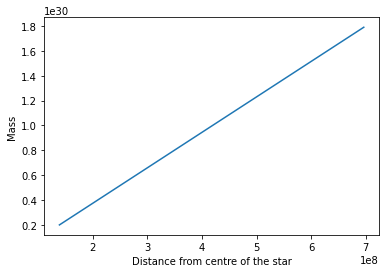

In [6]:
def mnrn(n):
    masses_shells=[]
    masses_inner=[]
    radii=[]
    for i in range(n-1):
        r=r_star*(n-i)/n
        radii.append(r)
        mass_shell=m/n
        mass_inner=(n-i-1)*m/n
        masses_inner.append(mass_inner)
        masses_shells.append(mass_shell)
    return masses_shells,masses_inner,radii
masses_shells,masses_inner,radii=mnrn(10)
plt.plot(radii,masses_inner)
plt.xlabel("Distance from centre of the star")
plt.ylabel("Mass")
plt.plot()

=> The exact curve is not exactly like this but I think we can approximate it this way.

[]

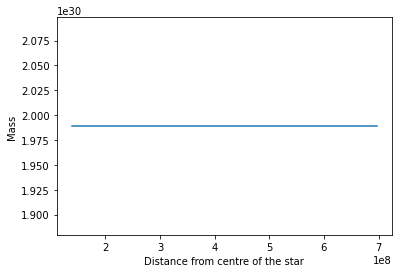

In [7]:
def density(n):
    masses_shells=[]
    radii=[]
    masses_inner=[]
    mass_remaining=m
    for i in range(n-1):
        r=((n-i)*r_star)/n
        radii.append(r)
        r_=(n-i-1)*r_star/n
        mass=4*np.pi*(r**2)*(rho/kg)*(r-r_)
        masses_shells.append(mass)
        mass_remaining-=mass
        masses_inner.append(mass_remaining)
    return masses_shells,masses_inner,radii
masses_shells,masses_inner,radii=density(10)
#plt.plot(radii,masses_shells)
plt.plot(radii,masses_inner)
plt.xlabel("Distance from centre of the star")
plt.ylabel("Mass")
plt.plot()

=> I think this is very strange so I recommend to not use the denisty. I assumed that the density is constant inside the whole sun but is definetly is not. So it is not a good idea to use this manner.

## Gravitation of bh <-> gravitation of star
### with each shell m/n and r/n

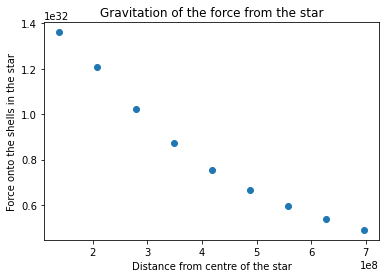

In [8]:
def gravitation_star_mnrn(n_shells):
    r_star = 696340*10**3
    grav_star=[]
    rad_star=[]
    mss=[]
    mass_remaining=m
    for i in range(n_shells-1):
        r=r_star*(n_shells-i)/n_shells
        rad_star.append(r)
        mass_shell=m/n_shells
        mass_inner=(n_shells-i-1)*m/n_shells
        mass_remaining-=mass_shell
        mss.append(mass_remaining)
        F_star=(G*mass_inner*mass_shell)/(r**2)
        grav_star.append(F_star)
    return grav_star,rad_star,mss
gstar_mnrn,rad_star,mass=gravitation_star_mnrn(10)
plt.scatter(rad_star,gstar_mnrn)
plt.xlabel("Distance from centre of the star")
plt.ylabel("Force onto the shells in the star")
plt.title("Gravitation of the force from the star")
plt.show()

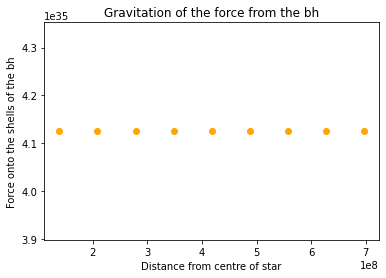

In [9]:
def gravitation_bh_mnrn(r_bh,n_shells):
    grav_bh=[]
    for i in range(n_shells-1):
        r=r_star*(n_shells-i)/n_shells
        F_bh=(G*M*(m/n_shells))/(r_bh**2)
        grav_bh.append(F_bh)
    return grav_bh
gbh_mnrn=gravitation_bh_mnrn(np.sqrt(x0**2+y0**2),10)

plt.scatter(rad_star,gbh_mnrn,color='orange')
plt.xlabel("Distance from centre of star")
plt.ylabel("Force onto the shells of the bh")
plt.title("Gravitation of the force from the bh")
plt.show()

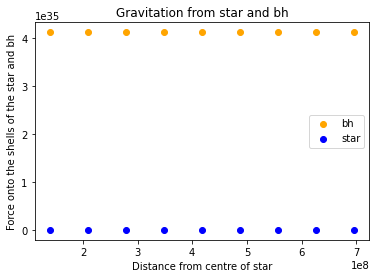

In [10]:
plt.scatter(rad_star,gbh_mnrn,color='orange',label="bh")
plt.scatter(rad_star,gstar_mnrn,color='blue',label="star")

plt.xlabel("Distance from centre of star")
plt.ylabel("Force onto the shells of the star and bh")
plt.title("Gravitation from star and bh")
plt.legend()
plt.show()

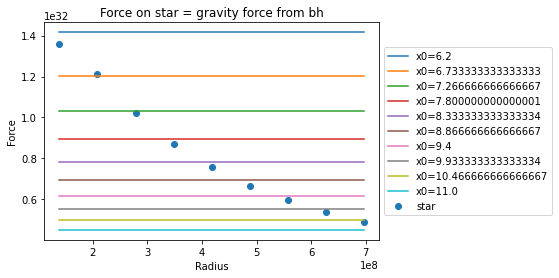

In [11]:
x0=r_tidal
y0=0
x0s=np.linspace(6.2,11,10)
for i in range(len(x0s)):
    r=np.sqrt((r_tidal*x0s[i])**2+y0**2)
    fbh=gravitation_bh_mnrn(r,10)
    plt.plot(radii,fbh,label="x0={}".format(x0s[i]))
plt.scatter(rad_star,gstar_mnrn,label="star")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Radius")
plt.ylabel("Force")
plt.title("Force on star = gravity force from bh")
plt.show()

=> The interesting region here is 6.2-11 times the true tidal radius

## Gravitation of bh <-> gravitation of star
### with each shell r/n and mass from density

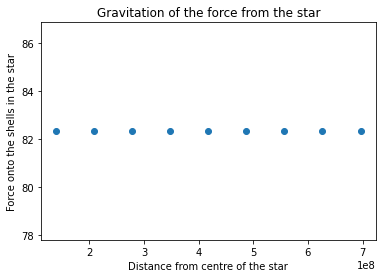

In [12]:
def gravitation_star_rho(n):
    rad=[]
    F_star=[]
    remaining_mass=m
    for i in range(n-1):
        r=((n-i)*r_star)/n
        rad.append(r)
        r_=(n-i-1)*r_star/n
        mass=4*np.pi*(r**2)*(rho/kg)*(r-r_)
        remaining_mass-=mass
        F=(G*remaining_mass*mass)/(r**2)
        F_star.append(F)
    return F_star,rad
gstar_rho,rad_star=gravitation_star_rho(10)
plt.scatter(rad_star,gstar_rho)
#plt.scatter(rad_star,mss)
plt.xlabel("Distance from centre of the star")
plt.ylabel("Force onto the shells in the star")
plt.title("Gravitation of the force from the star")
plt.show()

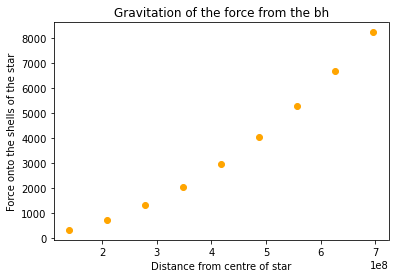

In [13]:
def gravitation_bh_rho(r_bh,n):
    rad=[]
    F_bh=[]
    for i in range(n-1):
        r=(n-i)*r_star/n
        rad.append(r)
        r_=(n-i-1)*r_star/n
        mass=4*np.pi*(r**2)*(rho/kg)*(r-r_)
        F=(G*M*mass)/(r_bh**2)
        F_bh.append(F)
    return F_bh,rad
gbh_rho,rad_star=gravitation_bh_rho(np.sqrt(x0**2+y0**2),10)
plt.scatter(rad_star,gbh_rho,color='orange')
plt.xlabel("Distance from centre of star")
plt.ylabel("Force onto the shells of the star")
plt.title("Gravitation of the force from the bh")
plt.show()

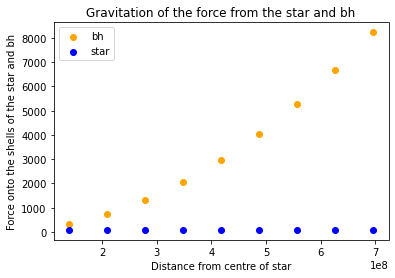

In [14]:
plt.scatter(rad_star,gbh_rho,color='orange',label="bh")
plt.scatter(rad_star,gstar_rho,color='blue',label="star")

plt.xlabel("Distance from centre of star")
plt.ylabel("Force onto the shells of the star and bh")
plt.title("Gravitation of the force from the star and bh")
plt.legend()
plt.show()

## Force of bh <-> gravitation of star
### with each shell m/n and r/n

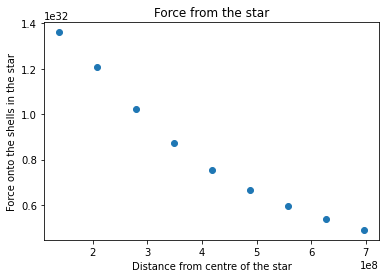

In [15]:
#this function stays the same
Fstar_mnrn,rad_star,mass=gravitation_star_mnrn(10)
#plt.plot(rad_star,mass)
plt.scatter(rad_star,Fstar_mnrn)
plt.xlabel("Distance from centre of the star")
plt.ylabel("Force onto the shells in the star")
plt.title("Force from the star")
plt.show()

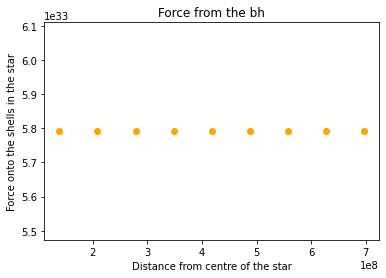

In [16]:
def force_bh_mnrn(t,x,y,v_x,v_y):
    ax=v_x_(t,x,y,v_x,v_y)
    ay=v_y_(t,x,y,v_x,v_y)
    a=np.sqrt(ax**2+ay**2)
    mass_shells,mass_inner,radii=mnrn(10)
    F=[]
    for i in range(len(mass_shells)):
        F.append(mass_shells[i]*a)
    return F,radii
Fbh_mnrn,radii=force_bh_mnrn(t,x0,y0,v_x0,v_y0)
plt.scatter(radii,Fbh_mnrn,color="orange")
plt.xlabel("Distance from centre of the star")
plt.ylabel("Force onto the shells in the star")
plt.title("Force from the bh")
plt.show()

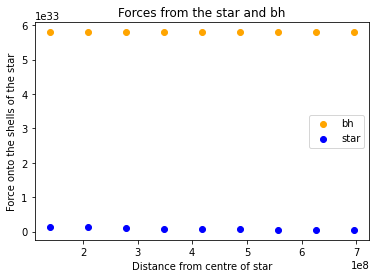

In [17]:
plt.scatter(rad_star,Fbh_mnrn,color='orange',label="bh")
plt.scatter(rad_star,Fstar_mnrn,color='blue',label="star")

plt.xlabel("Distance from centre of star")
plt.ylabel("Force onto the shells of the star")
plt.title("Forces from the star and bh")
plt.legend()
plt.show()

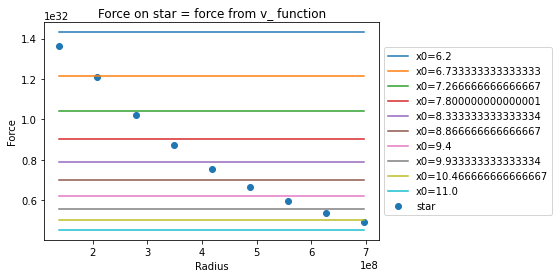

In [18]:
x0=r_tidal
y0=0
x0s=np.linspace(6.2,11,10)
for i in range(len(x0s)):
    fbh,radii=force_bh_mnrn(t,r_tidal*x0s[i],y0,v_x0,v_y0)
    plt.plot(radii,fbh,label="x0={}".format(x0s[i]))
plt.scatter(rad_star,gstar_mnrn,label="star")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Radius")
plt.ylabel("Force")
plt.title("Force on star = force from v_ function")
plt.show()

=> The interesting region here is 6.2-11 times the true tidal radius

## Force of bh <-> gravitation of star
### with each shell r/n and mass from density

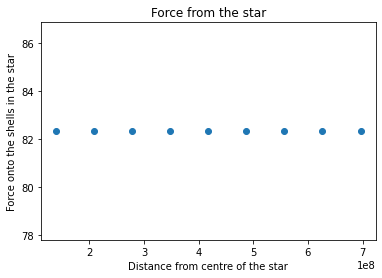

In [19]:
Fstar_rho,rad_star=gravitation_star_rho(10)
plt.scatter(rad_star,Fstar_rho)
plt.xlabel("Distance from centre of the star")
plt.ylabel("Force onto the shells in the star")
plt.title("Force from the star")
plt.show()

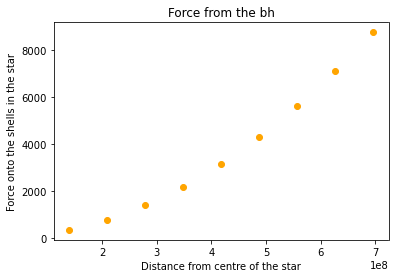

In [20]:
def force_bh_rho(t,x,y,v_x,v_y):
    ax=v_x_(t,x,y,v_x,v_y)
    ay=v_y_(t,x,y,v_x,v_y)
    a=np.sqrt(ax**2+ay**2)
    mass_shells,mass_inner,radii=density(10)
    F=[]
    for i in range(len(mass_shells)):
        F.append(mass_shells[i]*a)
    return F,radii
Fbh_rho,rad_star=force_bh_rho(t,x0,y0,v_x0,v_y0)
plt.scatter(rad_star,Fbh_rho,color="orange")
plt.xlabel("Distance from centre of the star")
plt.ylabel("Force onto the shells in the star")
plt.title("Force from the bh")
plt.show()

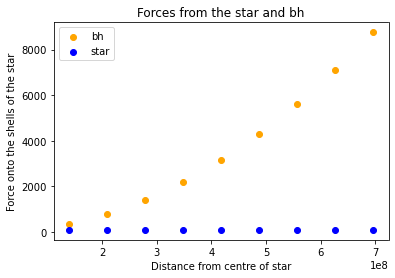

In [21]:
plt.scatter(rad_star,Fbh_rho,color='orange',label="bh")
plt.scatter(rad_star,Fstar_rho,color='blue',label="star")

plt.xlabel("Distance from centre of star")
plt.ylabel("Force onto the shells of the star")
plt.title("Forces from the star and bh")
plt.legend()
plt.show()

=> When we use the force of the bh, the values will all be way higher. If we only use the gravitational force of the bh, the values will be a little lower but not enough so it gets close to the solar force...

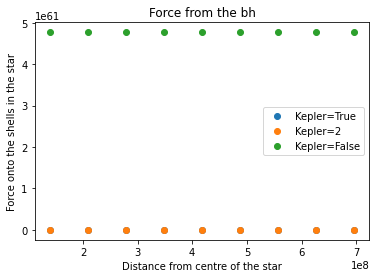

In [22]:
kep=[True,2,False]
for i in range(len(kep)):
    kepler=kep[i]
    Fbh,rad_star=force_bh_mnrn(t,x0,y0,v_x0,v_y0)
    plt.scatter(rad_star,Fbh,label="Kepler={}".format(kep[i]))
plt.xlabel("Distance from centre of the star")
plt.ylabel("Force onto the shells in the star")
plt.title("Force from the bh")
plt.legend()
plt.show()

In [23]:
def dVeff(x,y,mass):
    r=np.sqrt(x**2+y**2)
    Fbh=(G*M*mass)/(r**2)-(L**2)/(mass*r**3)+G*M*(L**2)/(mass*(c**2)*(r**4))
    return abs(Fbh)
print(dVeff(x0,y0,m))

5.076424200933237e+34


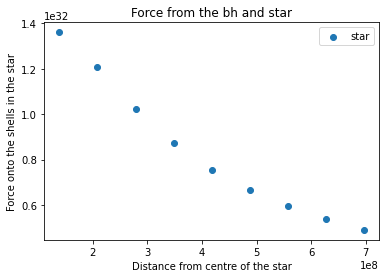

In [24]:
def f_bh_mnrn(x,y,n):
    mass_shells,mass_inner,radii=mnrn(10)
    F=[]
    for i in range(len(mass_shells)):
        Fbh=dVeff(x,y,mass_shells[i])
        F.append(Fbh)
    return F,radii

x0 =float(0)
y0 =float(8*10**9)  

fbh,radii=f_bh_mnrn(x0,y0,10)
#plt.scatter(radii,fbh,label="bh")
plt.scatter(rad_star,gstar_mnrn,label="star")

plt.xlabel("Distance from centre of the star")
plt.ylabel("Force onto the shells in the star")
plt.title("Force from the bh and star")
plt.legend()
plt.show()

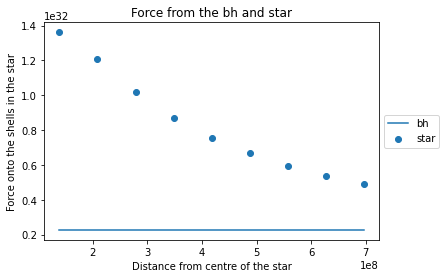

In [25]:
x0=6*r_tidal
y0=0
fbh,radii=f_bh_mnrn(x0,y0,10)
plt.plot(radii,fbh,label="bh")
plt.scatter(rad_star,gstar_mnrn,label="star")

plt.xlabel("Distance from centre of the star")
plt.ylabel("Force onto the shells in the star")
plt.title("Force from the bh and star")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

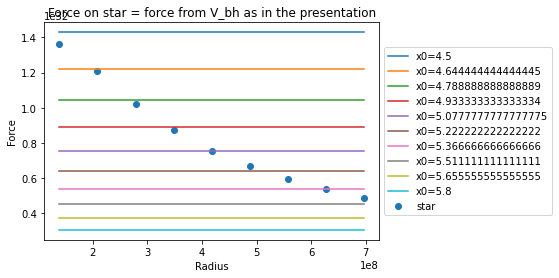

In [26]:
x0=r_tidal
y0=0
x0s=np.linspace(4.5,5.8,10)
for i in range(len(x0s)):
    fbh,radii=f_bh_mnrn(r_tidal*x0s[i],y0,10)
    plt.plot(radii,fbh,label="x0={}".format(x0s[i]))
plt.scatter(rad_star,gstar_mnrn,label="star")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Radius")
plt.ylabel("Force")
plt.title("Force on star = force from V_bh as in the presentation")
plt.show()

=> The interesting region is for radii between 4.6 and 5.5 times the true tidal radius.

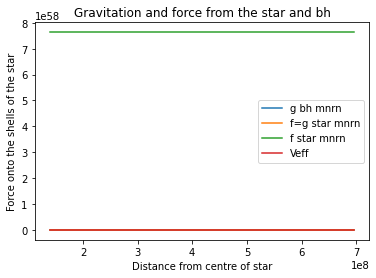

In [31]:
x0=5*r_tidal
y0=0
r=np.sqrt(x0**2+y0**2)
g_star,rad_star,mss=gravitation_star_mnrn(10)
gbh_mnrn=gravitation_bh_mnrn(r,10)

Fbh_mnrn=g_star
Fstar_mnrn,rad_star= force_bh_mnrn(t,x0,y0,v_x0,v_y0)
fbh,radii=f_bh_mnrn(x0,y0,10)

# after each line, I wrote the order from highes values to lowest values
plt.plot(rad_star,gbh_mnrn,label="g bh mnrn") #-----> 2
plt.plot(rad_star,gstar_mnrn,label="f=g star mnrn")#------>  3

#plt.plot(rad_star,gbh_rho,label="g bh rho")   #----> 5
#plt.plot(rad_star,gstar_rho,label="g star rho")#-----> 6

#plt.plot(rad_star,Fbh_mnrn,label="f bh mnrn")   #----->  1
plt.plot(rad_star,Fstar_mnrn,label="f star mnrn") #----> 3

#plt.plot(rad_star,Fbh_rho,label="f bh rho") #-----> 4
#plt.plot(rad_star,Fstar_rho,label="f star rho") #----> 6

plt.plot(rad_star,fbh,label="Veff")

plt.xlabel("Distance from centre of star")
plt.ylabel("Force onto the shells of the star")
plt.title("Gravitation and force from the star and bh")
plt.legend()
plt.show()